In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
data=sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


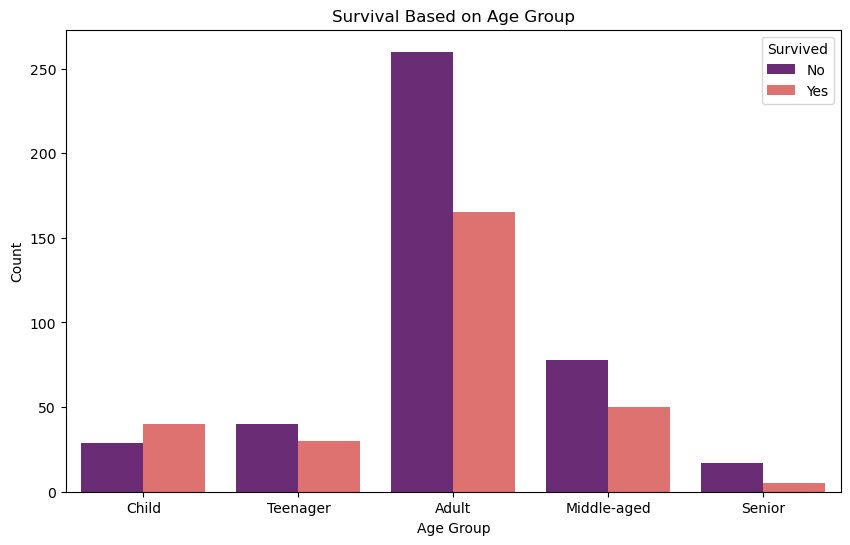

In [42]:
bins = [0,12,18,40,60,80]
labels = ['Child','Teenager','Adult','Middle-aged','Senior']
data['age_group'] = pd.cut(data['age'],bins=bins,labels=labels)
plot.figure(figsize=(10, 6))
sns.countplot(x='age_group',hue='survived',data=data,palette='magma')
plot.title('Survival Based on Age Group')
plot.xlabel('Age Group')
plot.ylabel('Count')
plot.legend(title='Survived',labels=['No','Yes'])
plot.show()

Survival by Gender and Class:
 sex     pclass  survived
female  1       1            91
                0             3
        2       1            70
                0             6
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: count, dtype: int64


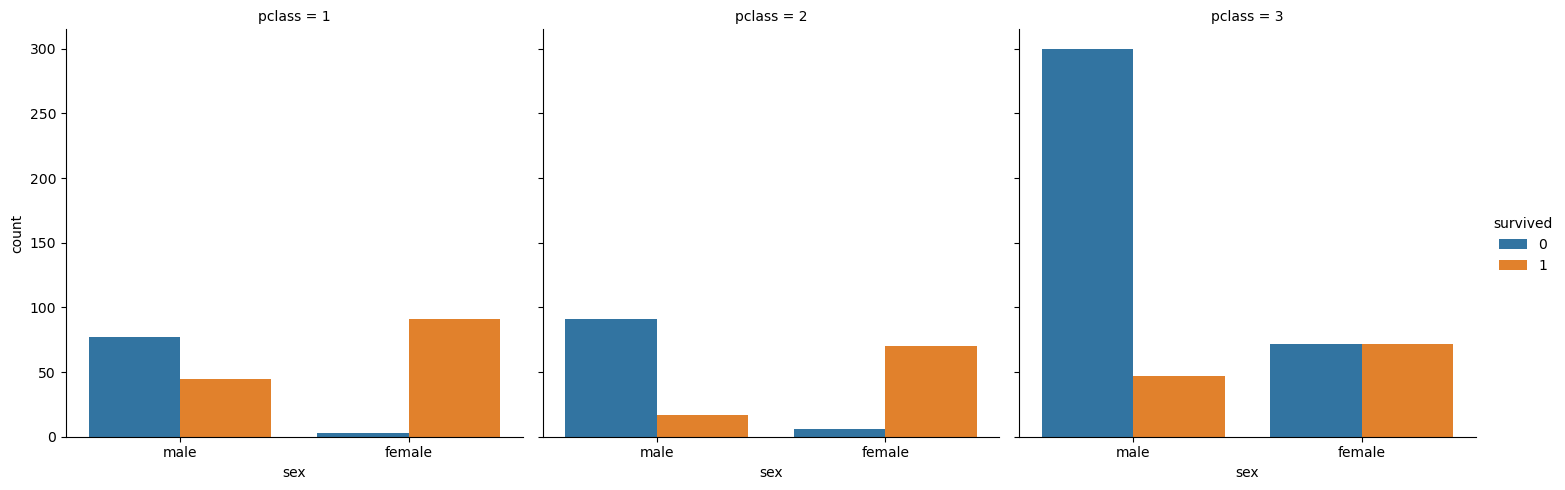

In [50]:
data_filled=data.copy()
print("Survival by Gender and Class:\n",data_filled.groupby(['sex','pclass'])['survived'].value_counts())
sns.catplot(x='sex',hue='survived',col='pclass',kind='count',data=data_filled)
plot.show()

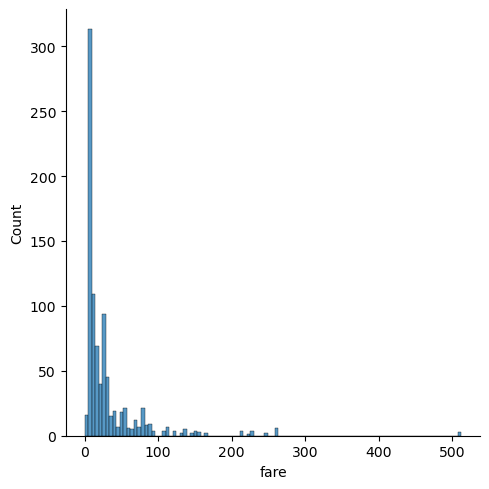

In [3]:
sns.displot(data['fare'],kde=False)

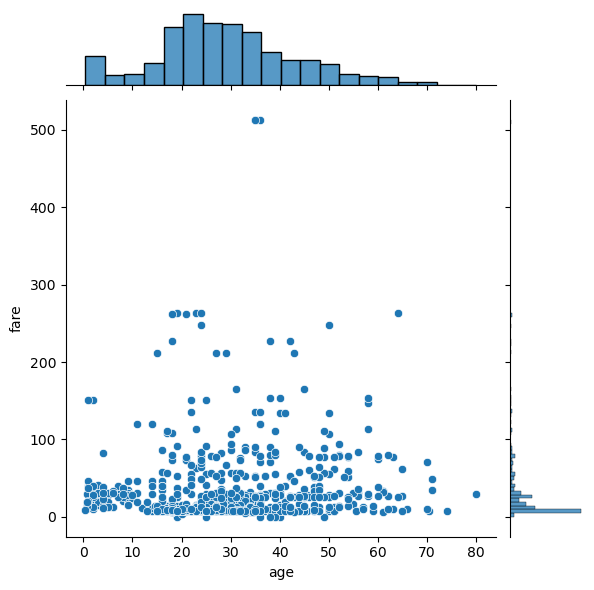

In [4]:
sns.jointplot(x='age',y='fare',data=data)

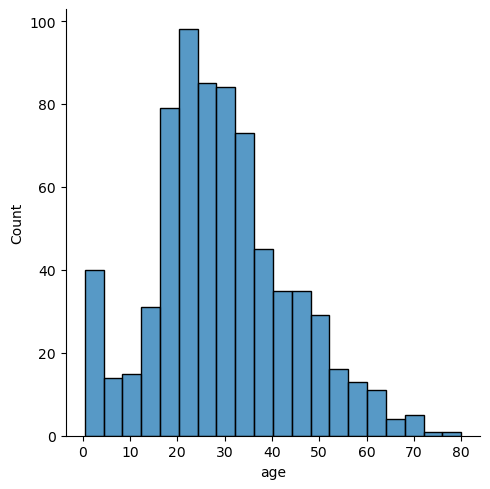

In [5]:
sns.displot(x='age',data=data)

<Axes: xlabel='fare'>

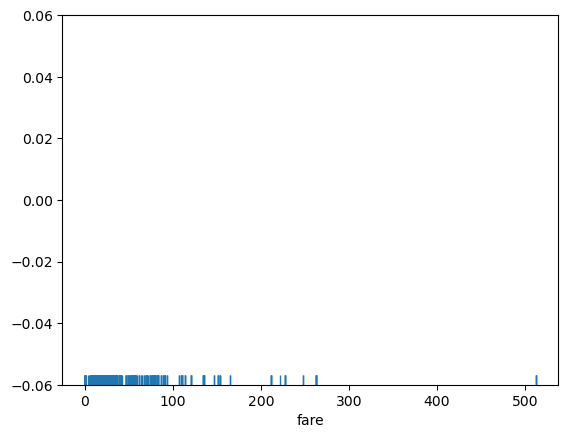

In [6]:
sns.rugplot(data['fare'])

<Axes: xlabel='fare'>

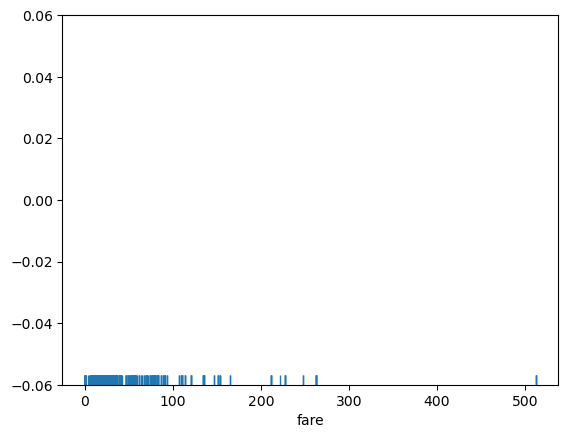

In [7]:
sns.rugplot(data=data,x='fare')

<Axes: xlabel='sex', ylabel='age'>

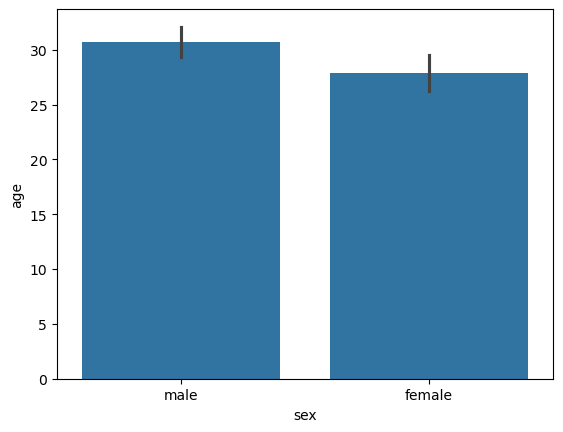

In [8]:
sns.barplot(x='sex',y='age',data=data)

<Axes: xlabel='sex', ylabel='count'>

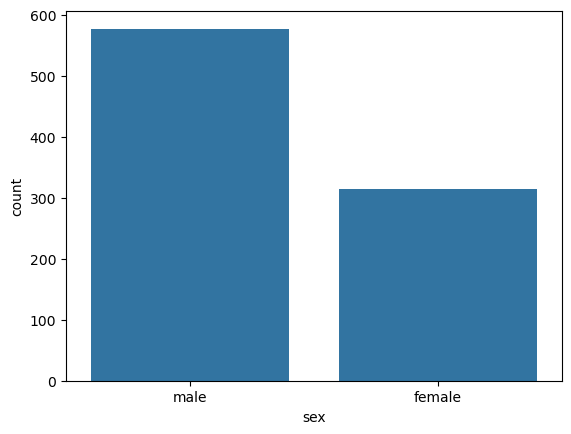

In [9]:
sns.countplot(x='sex',data=data)

<Axes: xlabel='sex', ylabel='age'>

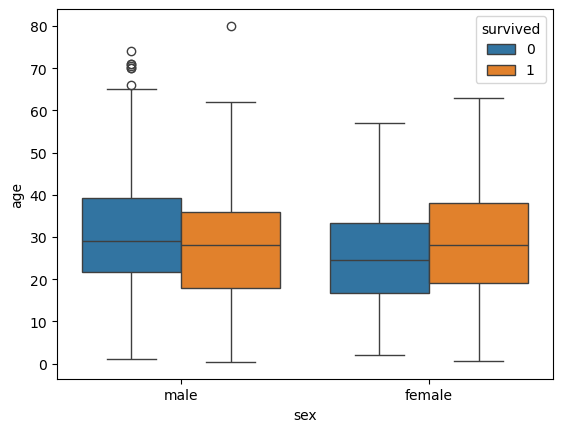

In [10]:
sns.boxplot(x='sex',y='age',data=data,hue="survived")

<Axes: xlabel='age'>

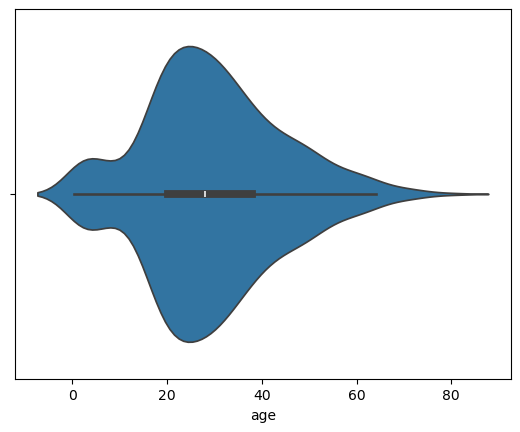

In [11]:
sns.violinplot(x='age',data=data)

<Axes: xlabel='age', ylabel='sex'>

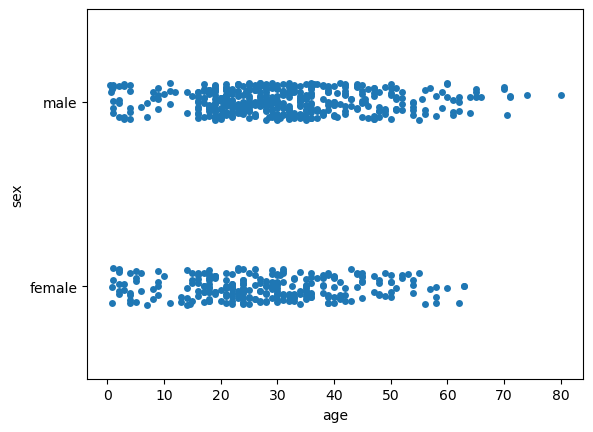

In [12]:
sns.stripplot(x='age',y='sex',data=data)

<Axes: xlabel='sex', ylabel='age'>

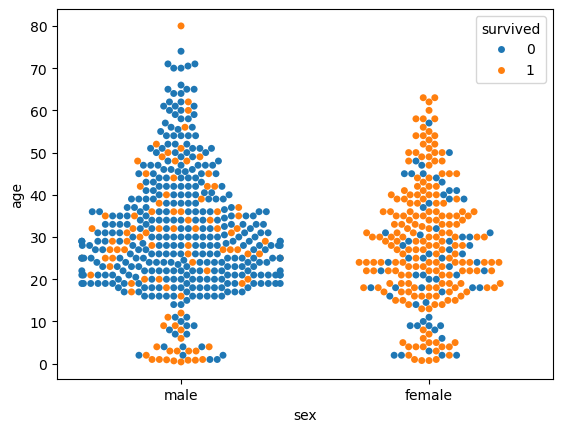

In [13]:
sns.swarmplot(x='sex',y='age',data=data,hue='survived')

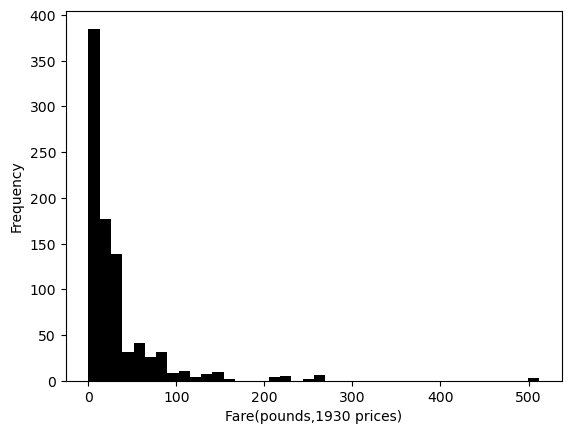

In [14]:
titanic_hist=data.fare.plot.hist(bins=40,color='black')
plot.xlabel('Fare(pounds,1930 prices)')
plot.show(titanic_hist)

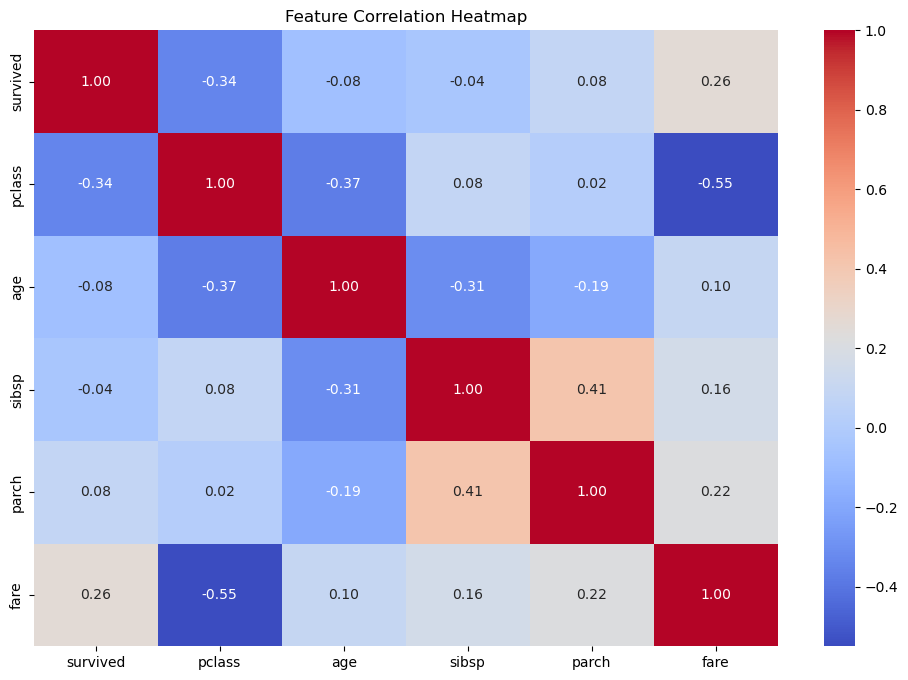

In [34]:
plot.figure(figsize=(12, 8))
numeric_features=data.select_dtypes(include=np.number)
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plot.title('Feature Correlation Heatmap')
plot.show()